<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Bike_Rental_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#uploading the dataset
from google.colab import files
files.upload()

In [0]:
#importing the essential dependencies
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [62]:
data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [63]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

From above we can see that some column names have to be modified and the dtypes of columns  such as  "season", "holiday", "workingday" and "weather" should be categorical.

In [0]:
#Lets rename the columns
data.rename(columns = {'instant' : 'id',
                      'dteday' : 'datetime',
                      'yr' : 'year',
                      'mnth' : 'month',
                      'hr' : 'hour',
                      'weathersit' : 'weather_condition',
                      'hum' : 'humidity',
                      'cnt' : 'count'}, inplace = True) 

Let's check which columns need a dtype change.

In [65]:
data.describe()

,id,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Now that we have attribute names cleaned up, we have to perform type-casting of attributes. From the above table we can see that  the attributes Season, year, month, holiday, weekday, workingday, weather_condition, hour can be categorical.

In [0]:
#Changing attributes to category type
category_variables = ['season','year','month','hour','holiday','weekday','workingday','weather_condition']
for var in category_variables:
  data[var] = data[var].astype('category')

In [0]:
#changing date to date type
data['datetime'] = pd.to_datetime(data.datetime)

In [68]:
data.dtypes

id                            int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
count                         int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


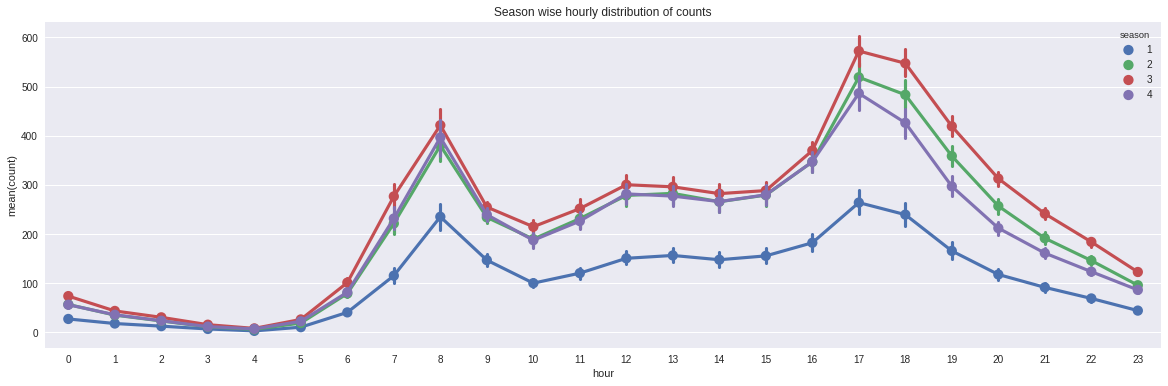

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
sns.pointplot(data = data[['hour','count','season']], x = 'hour', y = 'count', hue = 'season', ax = ax)
ax.set(title = 'Season wise hourly distribution of counts')
plt.show()

From the above plot we can infer that for all seasons the counts peak in the morning between 7-9am and in the evening betwen 4-6pm due to start and end of office hours. The counts are lowest for season 1 while highest for season 3.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


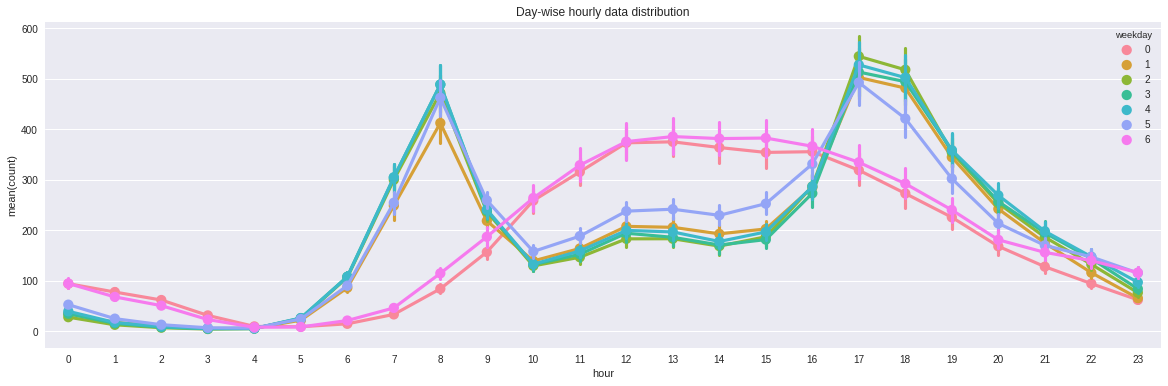

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
sns.pointplot(data = data[['hour','count','weekday']],x = 'hour', y = 'count', hue = 'weekday', ax = ax)
ax.set(title = 'Day-wise hourly data distribution')
plt.show()

Every working day follows the same pattern except saturday and sunday.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0.5, 1.0, 'monthly distribution of counts')]

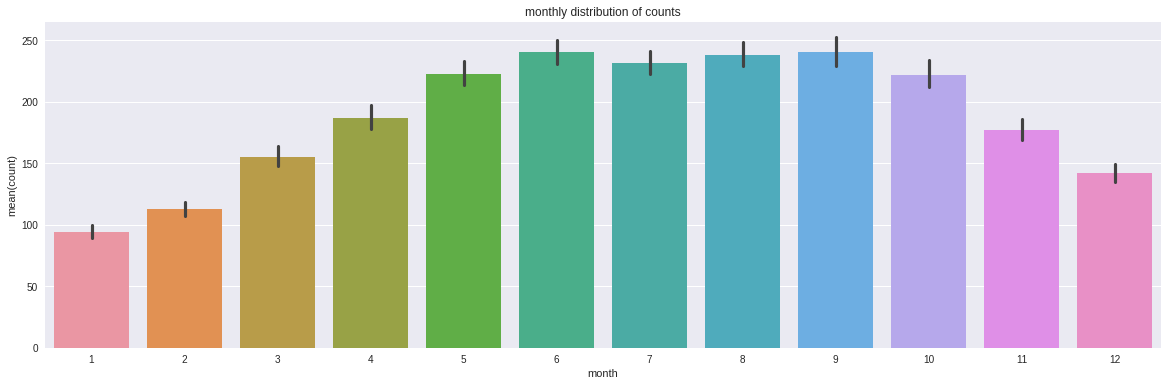

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
sns.barplot(data = data[['month','count']], x = 'month', y = 'count')
ax.set(title = 'monthly distribution of counts')

The months June-September see highest ridership.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0.5, 1.0, 'season-wise count distribution')]

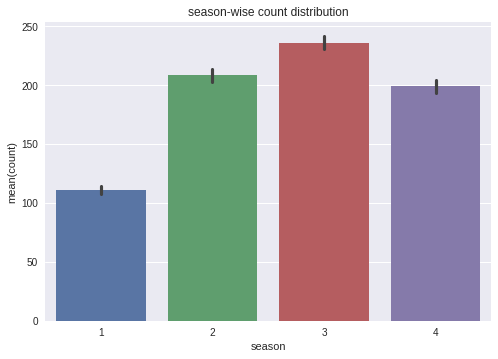

In [27]:
fig, ax = plt.subplots()
sns.barplot(data = data[['count','season']], x = 'season', y = 'count')
ax.set(title = 'season-wise count distribution')

Season 3 has the highest number of  riders.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


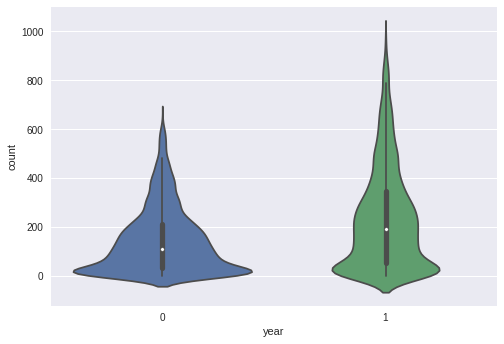

In [29]:
sns.violinplot(data = data[['year','count']], x = 'year', y = 'count')
plt.show()

The above plot helps us understand the multimodal distribution in both 2011 and 2012 ridership counts with 2011 having peaks at lower values as compared to 2012. The spread of counts is also much more for 2012, although the max density for both the years is between 100-200 rides.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


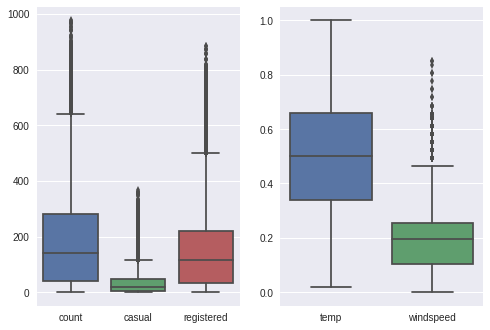

In [30]:
#finding outliers using boxplots
fig, (ax1,ax2) = plt.subplots(ncols = 2)
sns.boxplot(data = data[['count','casual','registered']], ax = ax1)
sns.boxplot(data = data[['temp', 'windspeed']], ax = ax2)

We can easily mark out that for the three count related attributes, all of them seem to have a sizable number of outlier values. The casual rider distribution has overall lower numbers though. For weather attributes of temperature and wind speed, we find outliers only
in the case of wind speed.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


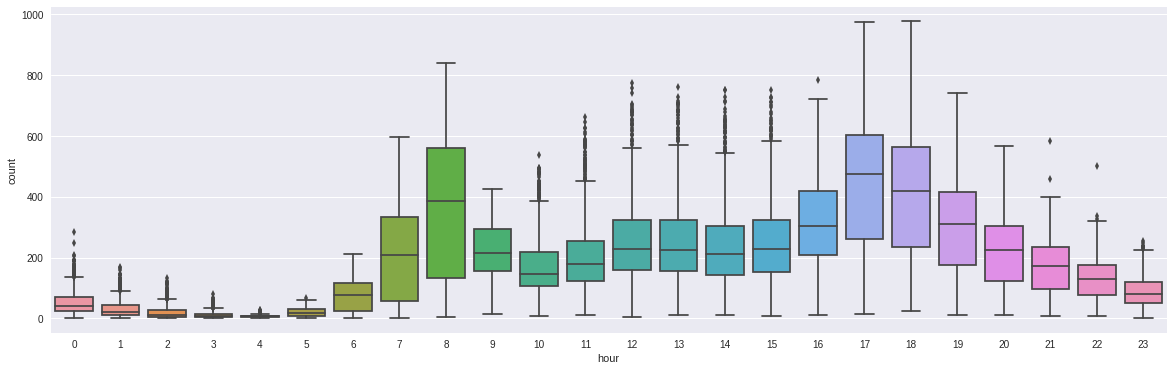

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
sns.boxplot(data = data[['hour','count']], x = 'hour', y = 'count', ax = ax)
plt.show()

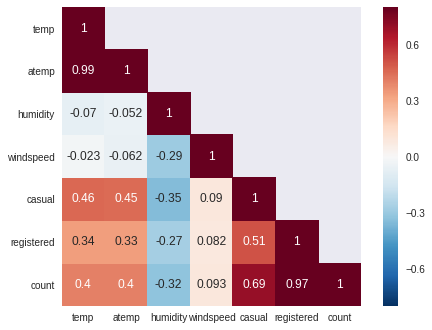

In [37]:
corr_matrix = data[['temp','atemp','humidity','windspeed','casual','registered','count']].corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix,mask = mask,vmax = .8, square = True, annot = True)
plt.show()

The two count variables, registered and casual, show obvious strong correlation to total_count.
Similarly, temp and atemp show high correlation. wind_speed and humidity have slight negative correlation. Overall, none of the attributes show high correlational statistics.

In [0]:
#removing outliers
dataWithoutOutliers = data[np.abs(data["count"]-data["count"].mean())<=(3*data["count"].std())] 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


((array([-3.94171042, -3.72363151, -3.60421718, ...,  3.60421718,
          3.72363151,  3.94171042]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.5971457 ,
         6.59850903])),
 (1.3490324630370492, 4.544366339498316, 0.9601811537292394))

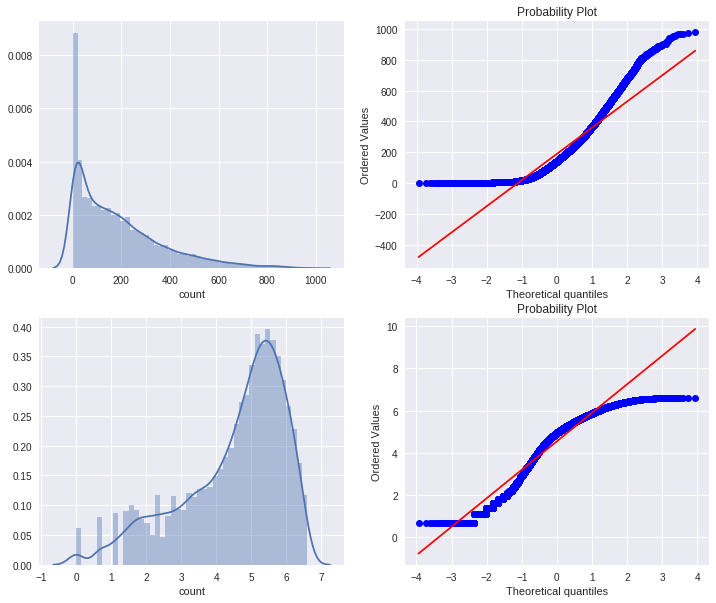

In [72]:
#Visualizing distribution of data
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(data["count"],ax=axes[0][0])
stats.probplot(data["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(dataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

It is visible from the above figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

In [74]:
#Random Forest Model To Predict 0's In Windspeed
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather_condition","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
categoricalFeatureNames = ["season","holiday","workingday","weather_condtion","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]

In [0]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data.iloc[:,0:-3],data.iloc[:,-1],test_size=0.33, random_state=42)

In [0]:
X.reset_index(inplace=True)
y = y.reset_index()

In [0]:
X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [80]:
X.columns

Index(['id', 'datetime', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')

In [0]:
#Dropping unnecessary variables
X = X.drop(["datetime"], axis = 1)
X_test = X_test.drop(["datetime"],axis = 1)

In [86]:
X_test.columns

Index(['index', 'id', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed'],
      dtype='object')

In [0]:
X = X.drop(["index"], axis = 1)
X_test = X_test.drop(["index"],axis = 1)

In [89]:
X_test.columns

Index(['id', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed'],
      dtype='object')

In [0]:
#RMSLE scorer
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [94]:
# Initialize linear regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(y)
lModel.fit(X = X,y = yLabelsLog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Make predictions
preds = lModel.predict(X= x_test)
rmsle_ = rmsle(np.exp(yLabelsLog),np.exp(preds),False)
print ("RMSLE Value For Linear Regression: ",rmsle_)